In [97]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [98]:
#Loading data
df=pd.read_csv('END_TO_END_SALES.csv')
df

,Namee,Email,Contact,City,Referencee,Handled_By,Leadd,Converted,To_Be_Converted
0,Dinesh Deenu,dinesgdeenu88123@gmgil.com,9923998794,Bageshwar,Google Ad,Ronak Jadhav,End Lead,NO,NO
1,Chellapandi Pandi,cpcginnng@gmgil.com,9782442949,Madurai,Google Ad,Deepali Kasatwar,Active lead,NO,NO
2,Anand Nanda,gngndngndg990@gmgil.com,8929922349,jamakandi,Google Ad,Roshan Patil,Active lead,NO,NO
3,Saroj Kumar,sknilgm88@gmgil.com,8921739233,Kolkata,Google Ad,Kiran Dhakal,Active lead,NO,NO
4,Jitendrasinh Rajput Garashiya,jitendrgsingrgjput345345@gmgil.com,9323891992,Anand,Insta,Pooja Melwani,Active lead,NO,NO
...,...,...,...,...,...,...,...,...,...
995,daniel,dgnieljognson789@yggoo.com,9247832721,Mumbai,FB,Abhijeet Bramhane,Hot lead,NO,YES
996,sophia p,sopgigprice234@gmgil.com,9243212721,Nagpur,FB,Akash Sharma,Hot lead,YES,Coverted
997,william adams,willigmgdgms456@gotmgil.com,9229432721,Dibrugarh,FB,Suryakant Choudhary,End Lead,NO,NO
998,mialee,miglee789@yggoo.com,9243192721,Vaidpura Etawah,FB,Sushant Nikam,End Lead,NO,NO


Choosing TO_BE_CONVERTED AS TARGET.

In [99]:
# Taking the features that we need for processing
df=df[['Referencee','Handled_By','Leadd','To_Be_Converted']]
df

,Referencee,Handled_By,Leadd,To_Be_Converted
0,Google Ad,Ronak Jadhav,End Lead,NO
1,Google Ad,Deepali Kasatwar,Active lead,NO
2,Google Ad,Roshan Patil,Active lead,NO
3,Google Ad,Kiran Dhakal,Active lead,NO
4,Insta,Pooja Melwani,Active lead,NO
...,...,...,...,...
995,FB,Abhijeet Bramhane,Hot lead,YES
996,FB,Akash Sharma,Hot lead,Coverted
997,FB,Suryakant Choudhary,End Lead,NO
998,FB,Sushant Nikam,End Lead,NO


In [100]:
# Checking for null values in any row
df.isnull().sum()

Referencee         0
Handled_By         0
Leadd              0
To_Be_Converted    0
dtype: int64

In [101]:
# Descriptive statistic
df.describe()

,Referencee,Handled_By,Leadd,To_Be_Converted
count,1000,1000,1000,1000
unique,7,18,3,4
top,FB,Deepali Kasatwar,End Lead,NO
freq,228,66,496,912


In [102]:
df['To_Be_Converted'].value_counts()

NO           912
Coverted      61
YES           26
Converted      1
Name: To_Be_Converted, dtype: int64

Above "Converted" AND "Coverted" means same.


In [103]:
#So we need to make replace coverted to converted.
rep={'Coverted':'Converted'}
df['To_Be_Converted']=df['To_Be_Converted'].replace(rep)

C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_25268\690993579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['To_Be_Converted']=df['To_Be_Converted'].replace(rep)


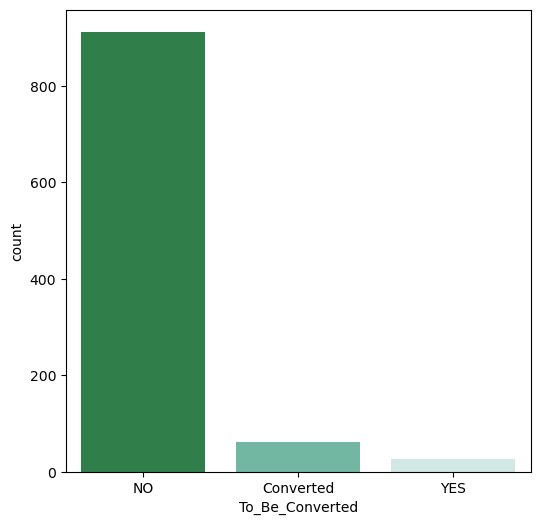

In [104]:
# counting no of customer converted and those not converted through visulization
plt.figure(figsize=(6,6))
sns.countplot(x='To_Be_Converted',data=df,palette ="BuGn_r")
plt.show()

In [105]:
# Counts of each Categories present in 'Leadd'
df['Leadd'].value_counts()

End Lead       496
Active lead    362
Hot lead       142
Name: Leadd, dtype: int64

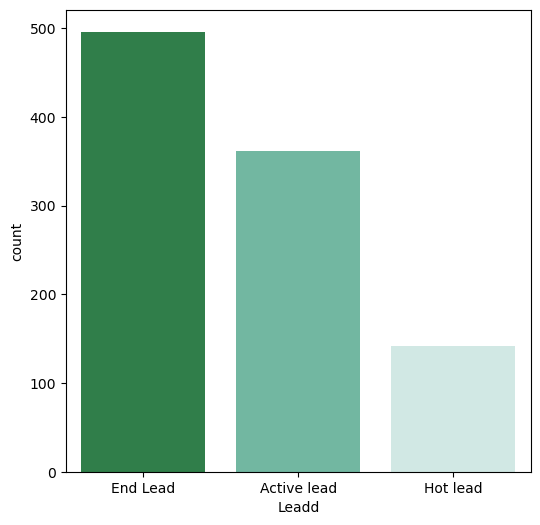

In [106]:
# counting leads through visualization
plt.figure(figsize=(6,6))
sns.countplot(x='Leadd',data=df,palette ="BuGn_r")
plt.show()

In [107]:
#Counts of people as per customers they had handled 
df['Handled_By'].value_counts()

Deepali Kasatwar       66
Nilesh Shinde          65
Ronak Jadhav           64
Sushant Nikam          64
Anchal Mishra          64
Abhijeet Bramhane      61
Azimuddin Mohd         61
Roshan Patil           60
Pooja Melwani          60
Tamanna Sahu           59
Deepali Yadav          57
Manisha Parte          56
Ritik Yadav            55
Kiran Dhakal           54
Akash Sharma           53
Suryakant Choudhary    51
Rohit Sonar            40
Senthil Nadar          10
Name: Handled_By, dtype: int64

In [108]:
df['Referencee'].unique()

array(['Google Ad', 'Insta', 'FB', 'Investment Leads', 'Calling',
       'whatsapp', 'PZ VIP'], dtype=object)

In [109]:
df['Referencee'].value_counts()

FB                  228
Insta               220
Investment Leads    200
Google Ad           195
whatsapp             98
Calling              31
PZ VIP               28
Name: Referencee, dtype: int64

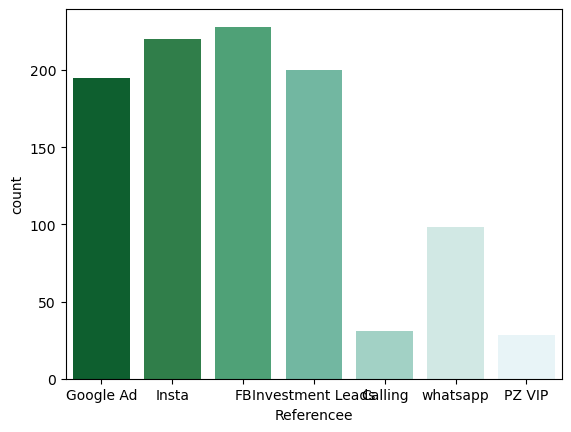

In [110]:
sns.countplot(x='Referencee',data=df,palette ="BuGn_r")
plt.show()

In [111]:
# For data processing
from sklearn import preprocessing

In [112]:
label_Encoder=preprocessing.LabelEncoder()

In [113]:
# Encode the column Lead
df['Leadd']=label_Encoder.fit_transform(df['Leadd'])
# 0===Active lead =Customer had still not said that I havent liked the product(had shown some interst)
# 1===End Lead =Customer had said that he is not intersted in the product
# 2===Hot Lead =Customer had liked the product

C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_25268\4075583348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Leadd']=label_Encoder.fit_transform(df['Leadd'])


In [114]:
# For To-Be_Converted we need to do ordinal encoding as feature has 3 category.
encode_to={'NO':0, 'Converted':1,"YES":1}
df['To_Be_Converted']=df['To_Be_Converted'].replace(encode_to)



C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_25268\380472613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['To_Be_Converted']=df['To_Be_Converted'].replace(encode_to)


In [115]:
# Ordinal encoder on Hanled_By
Encode_Handles_By={'Deepali Kasatwar':0,'Nilesh Shinde':1,'Ronak Jadhav':2,'Sushant Nikam':4,
                   'Anchal Mishra':5,'Abhijeet Bramhane':6,'Azimuddin Mohd':7,'Roshan Patil':8,
                   'Pooja Melwani':9,'Tamanna Sahu':10,'Deepali Yadav':11,'Manisha Parte':12,'Ritik Yadav':13,
                   'Kiran Dhakal':14,'Akash Sharma':15,'Suryakant Choudhary':16,'Rohit Sonar':17,'Senthil Nadar':18}

df['Handled_By']=df['Handled_By'].replace(Encode_Handles_By)

C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_25268\216669258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Handled_By']=df['Handled_By'].replace(Encode_Handles_By)


In [116]:
df[1:40]

,Referencee,Handled_By,Leadd,To_Be_Converted
1,Google Ad,0,0,0
2,Google Ad,8,0,0
3,Google Ad,14,0,0
4,Insta,9,0,0
5,Insta,12,0,0
6,Insta,5,2,0
7,Insta,1,0,0
8,Insta,11,0,0
9,Insta,13,1,0
10,Insta,6,1,0


In [117]:
# Ordinal Encoding on Reference
Encode_Reference={'FB':0,'Google Ad':1,'Insta':2,'Investment Leads':3,'Calling':4,'whatsapp':4,'PZ VIP':5}
df['Referencee']=df['Referencee'].replace(Encode_Reference)

C:\Users\AMEYA RAJESH PATIL\AppData\Local\Temp\ipykernel_25268\1757216728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Referencee']=df['Referencee'].replace(Encode_Reference)


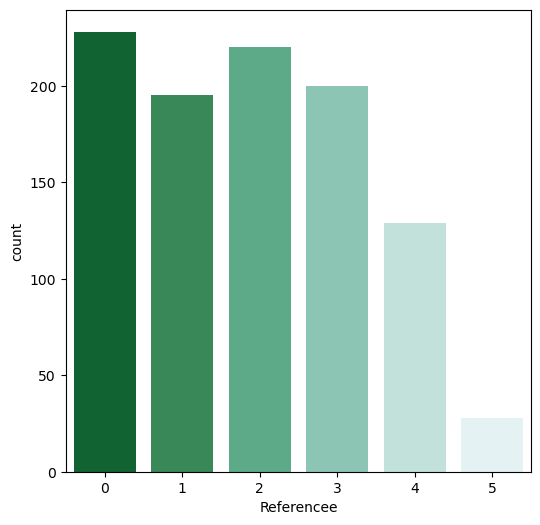

In [118]:
# visualization of reference
plt.figure(figsize=(6,6))
sns.countplot(x='Referencee',data=df,palette ="BuGn_r")
plt.show()

In [119]:
# Spliting in x and y 
x=df[['Referencee','Handled_By','Leadd']]
y=df['To_Be_Converted']

In [120]:
x


,Referencee,Handled_By,Leadd
0,1,2,1
1,1,0,0
2,1,8,0
3,1,14,0
4,2,9,0
...,...,...,...
995,0,6,2
996,0,15,2
997,0,16,1
998,0,4,1


In [121]:
y=pd.DataFrame(y)
y

,To_Be_Converted
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,0
998,0


In [122]:
# Training And Testing the Dataset
from sklearn.model_selection import train_test_split


#Giving Test size to 20% and random state to 30.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 30)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 3) (800, 1)
Test set: (200, 3) (200, 1)


In [123]:
#Applying Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler=StandardScaler()

xtrain=scaler.fit_transform(X_train)
xtest=scaler.transform(X_test)

In [124]:
 # Applying logistic regression on data
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
 


c:\Users\AMEYA RAJESH PATIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

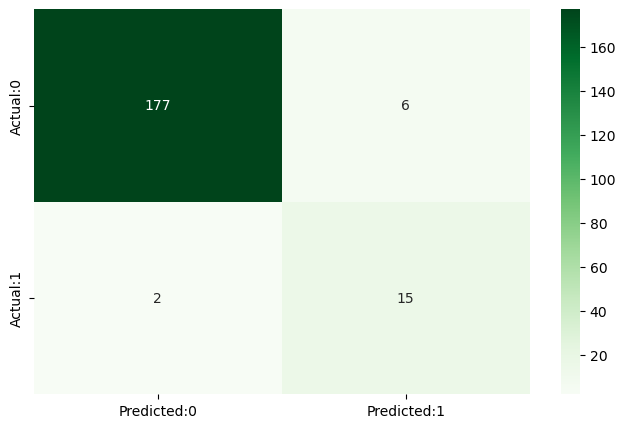

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       183
           1       0.71      0.88      0.79        17

    accuracy                           0.96       200
   macro avg       0.85      0.92      0.88       200
weighted avg       0.97      0.96      0.96       200



In [126]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
 
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))